## Importing Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import cartopy.crs as ccrs
import cartopy
%matplotlib inline


## LOADING BHL DATA

In [2]:
#load all files
BLH_dir = glob.glob('Data/BLH/*')

ds = xr.open_dataset(BLH_dir[0])
ds

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, time: 12)
Coordinates:
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 38.0 37.75 37.5 37.25 ... 8.75 8.5 8.25 8.0
  * time       (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Data variables:
    blh        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-14 07:36:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

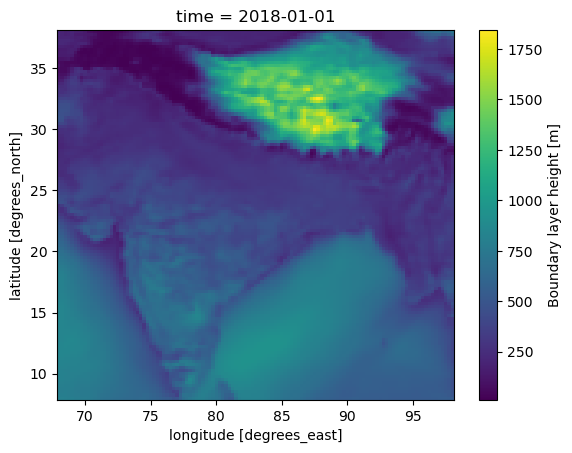

In [3]:
ds.blh.isel(time=0).plot()

## Reindexing latitude from (38,8) to (8,38)

In [4]:
#Reversing the lattitude value 
ds1 = ds.reindex(latitude=ds.latitude[::-1])
ds1

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 121, time: 12)
Coordinates:
  * longitude  (longitude) float32 68.0 68.25 68.5 68.75 ... 97.5 97.75 98.0
  * latitude   (latitude) float32 8.0 8.25 8.5 8.75 ... 37.25 37.5 37.75 38.0
  * time       (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Data variables:
    blh        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-14 07:36:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Slicing longitude and latitude between (8,38) and (68,98) respectively

In [5]:
ds2 = ds1.sel(latitude=slice(8.0,38.0),longitude=slice(68.0,98.0))
ds2.blh.min()

<xarray.DataArray 'blh' ()>
array(10.38635254)

## Plotting Graph

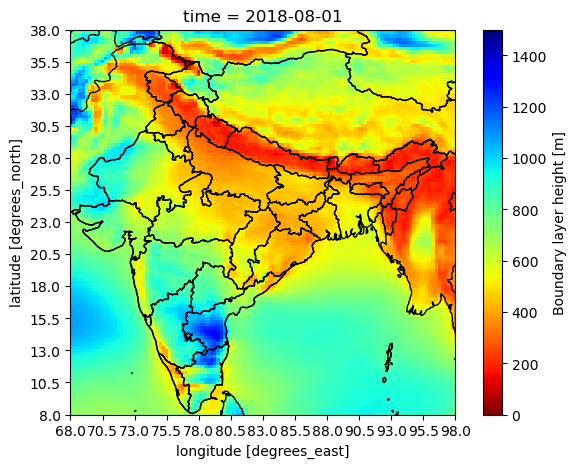

In [6]:
fig = plt.figure(figsize=(7,5))
cmap = plt.cm.get_cmap('jet')
projection=ccrs.PlateCarree(central_longitude=0)
ax=plt.axes(projection=projection)

#lat and long limits

ds2.blh.isel(time=7).plot(vmin=0, vmax=1500,robust=True,cmap=cmap.reversed(),ax = ax)
ax.set_extent([68,98,8,38], crs=projection)
ax.coastlines() #adding coastline
#ax.gridlines() #adding gridlines
ax.set_xticks(ds.longitude[::10])
ax.set_yticks(ds.latitude[::10])
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', edgecolor='black') ##Adding borders
ax.add_feature(cartopy.feature.STATES, linestyle='-', edgecolor='black') ##adding state borders
plt.show()

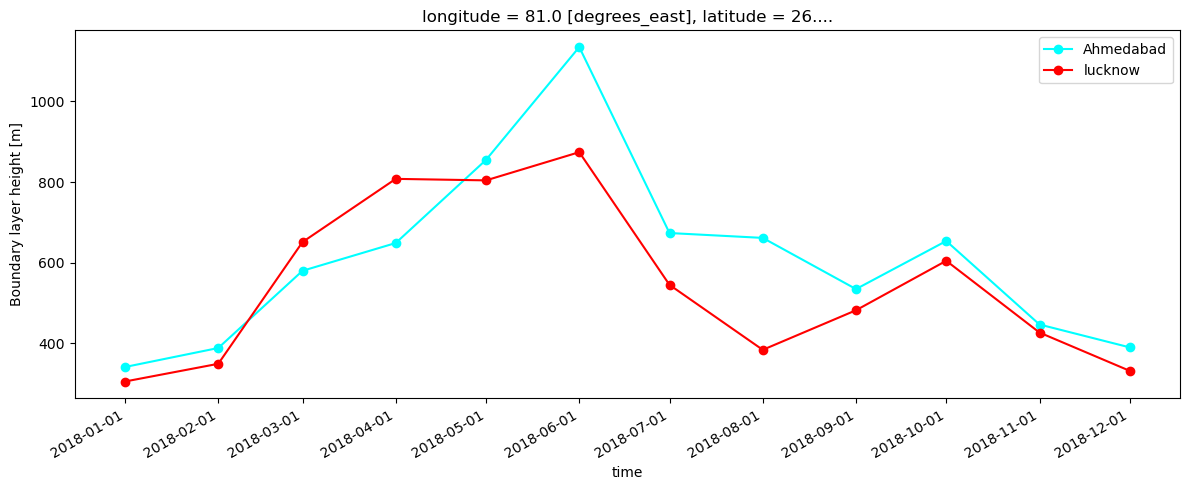

In [7]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig1 = ds2.blh.sel(latitude=23.0225,longitude=72.5714,method='nearest').plot(x='time',marker = 'o',color = 'cyan',label='Ahmedabad' )
fig2 = ds2.blh.sel(latitude=26.84,longitude=80.9462,method='nearest').plot(x='time',marker = 'o',color = 'red',label='lucknow')
plt.xticks(ds2.blh.time)
plt.legend()
plt.show()
